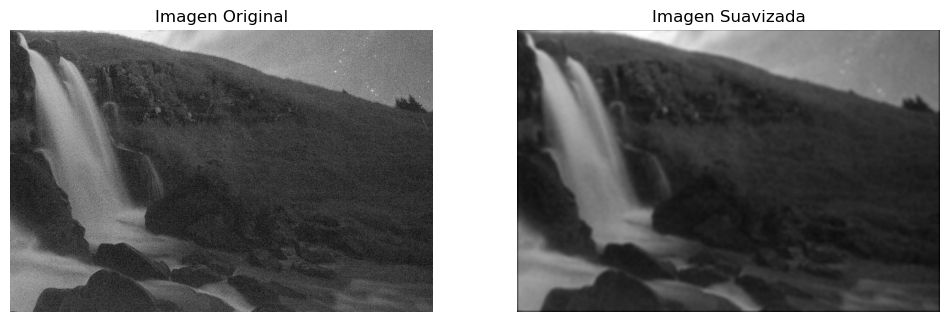

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def gaussian_kernel(size, sigma=1):
    """Genera un kernel gaussiano."""
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) *
        np.exp(- ((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

def convolve2d(image, kernel):
    """Aplica la convolución 2D a la imagen en escala de grises."""
    kernel_size = kernel.shape[0]
    padding = kernel_size // 2
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    output = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.sum(padded_image[i:i+kernel_size, j:j+kernel_size] * kernel)
    
    return output

# Leer la imagen original en escala de grises
imagen = Image.open('paisaje.jpg').convert('L')  # Convertir a escala de grises
imagen_np = np.array(imagen)

# Generar un kernel gaussiano
kernel_size = 9
sigma = 10
kernel = gaussian_kernel(kernel_size, sigma)

# Aplicar un suavizado con filtro Gaussiano
imagen_suavizada = convolve2d(imagen_np, kernel)

# Mostrar los resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(imagen_np, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen Suavizada')
plt.imshow(imagen_suavizada, cmap='gray')
plt.axis('off')

plt.show()


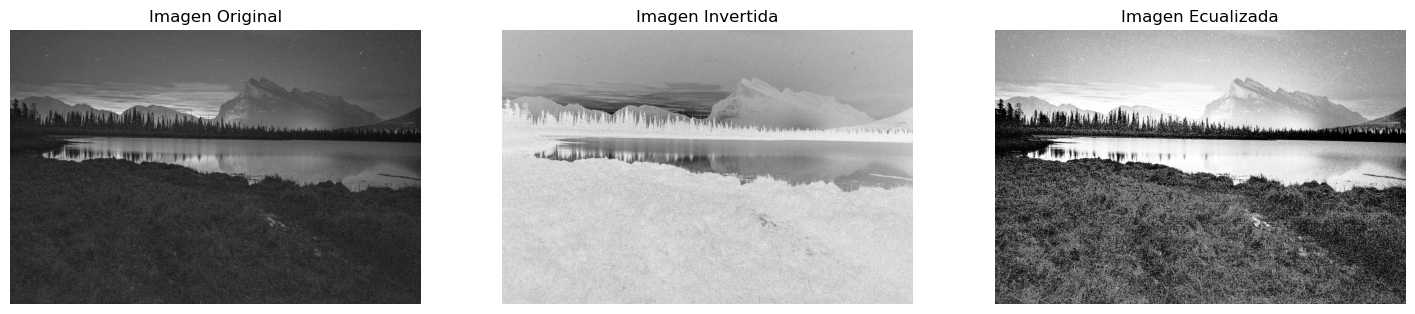

In [2]:
def read_image_as_gray(filename):
    """Lee una imagen en escala de grises usando PIL."""
    img = Image.open(filename).convert('L')
    return np.array(img)

def invert_colors(image):
    """Invierte los colores de una imagen."""
    return 255 - image

def equalize_histogram(image):
    """Ecualiza el histograma de una imagen."""
    # Calcular el histograma y el mapa de acumulación
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum()  # Función de distribución acumulada
    cdf_normalized = cdf * 255 / cdf[-1]  # Normalizar CDF
    image_eq = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    return image_eq.reshape(image.shape).astype(np.uint8)

# Leer las imágenes en escala de grises
imagen2 = read_image_as_gray('paiaje2.jpg')

# Aplicar transformaciones
imagen2_invertida = invert_colors(imagen2)
imagen2_ecualizada = equalize_histogram(imagen2)

# Mostrar las imágenes
plt.figure(figsize=(18, 6))

# Imagen Original
plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(imagen2, cmap='gray')
plt.axis('off')

# Imagen Invertida
plt.subplot(1, 3, 2)
plt.title('Imagen Invertida')
plt.imshow(imagen2_invertida, cmap='gray')
plt.axis('off')

# Imagen Ecualizada
plt.subplot(1, 3, 3)
plt.title('Imagen Ecualizada')
plt.imshow(imagen2_ecualizada, cmap='gray')
plt.axis('off')

plt.show()


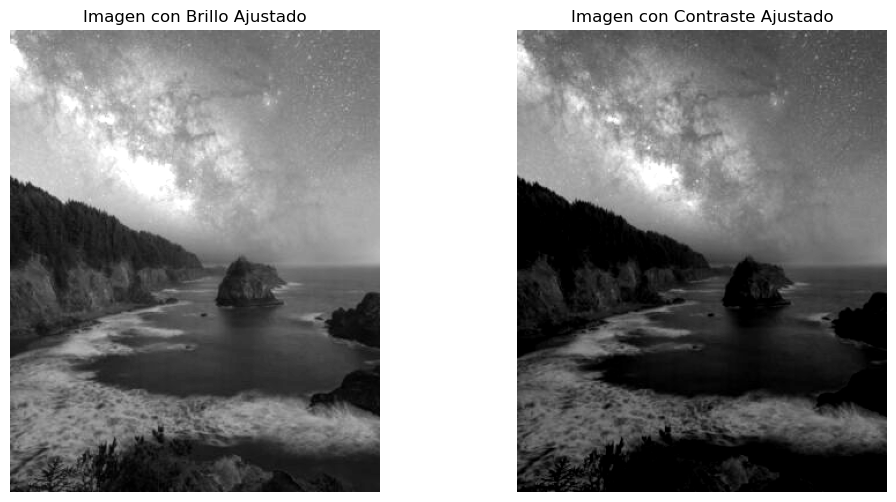

In [3]:

def adjust_brightness(image, factor):
    """Ajusta el brillo de la imagen."""
    return np.clip(image * factor, 0, 255).astype(np.uint8)

def adjust_contrast(image, factor):
    """Ajusta el contraste de la imagen."""
    mean = np.mean(image)
    return np.clip((image - mean) * factor + mean, 0, 255).astype(np.uint8)

# Leer la imagen
img = np.array(Image.open('playa.jpg').convert('L'))

# Ajustar brillo y contraste
img_bright = adjust_brightness(img, 1.5)
img_contrast = adjust_contrast(img, 1.5)

# Mostrar resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Imagen con Brillo Ajustado')
plt.imshow(img_bright, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen con Contraste Ajustado')
plt.imshow(img_contrast, cmap='gray')
plt.axis('off')

plt.show()


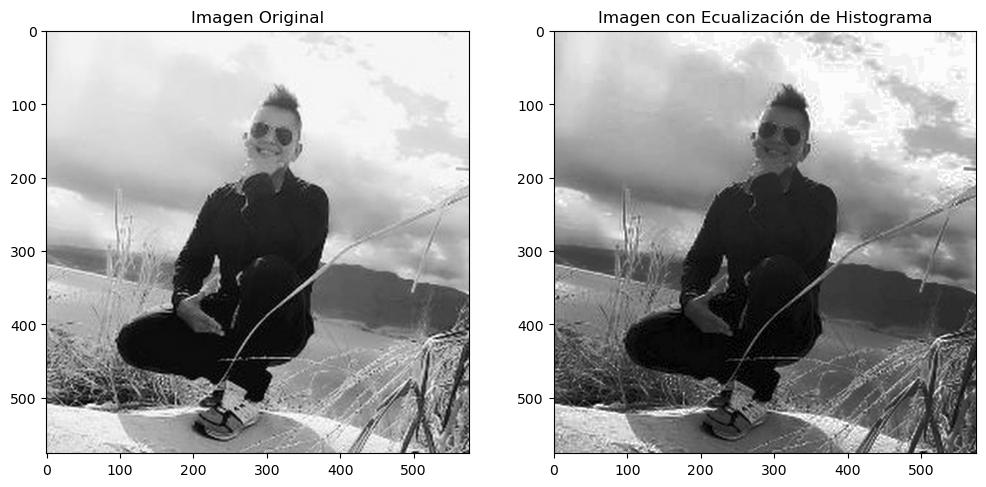

In [4]:
def hist_equalization(image):
    """Aplica ecualización de histograma a una imagen."""
    # Calcular el histograma de la imagen
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    # Calcular la función de distribución acumulativa (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Ecualizar la CDF
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
    
    # Mapear los valores originales de la imagen a los ecualizados
    img_equalized = cdf_final[image]
    
    return img_equalized

# Cargar la imagen en escala de grises
imagen = np.array(Image.open('perfil.jpg').convert('L'))

# Aplicar la ecualización de histograma
imagen_ecualizada = hist_equalization(imagen)

# Mostrar la imagen original y la imagen con iluminación mejorada
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(imagen, cmap='gray'), plt.title('Imagen Original')
plt.subplot(122), plt.imshow(imagen_ecualizada, cmap='gray'), plt.title('Imagen con Ecualización de Histograma')
plt.show()


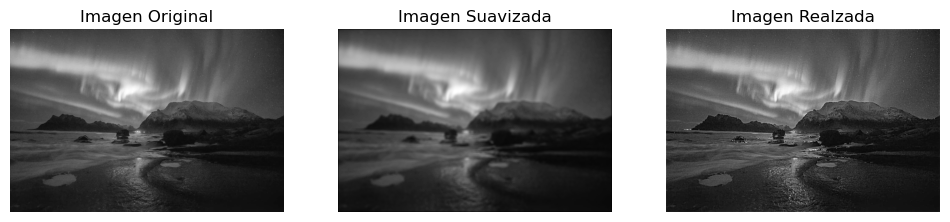

In [5]:
def gaussian_kernel(kernel_size, sigma):
    """Genera un kernel gaussiano."""
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)

def apply_filter(image, kernel):
    """Aplica un filtro a la imagen usando convolución."""
    kernel_size = kernel.shape[0]
    pad = kernel_size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    output = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            output[i, j] = np.sum(region * kernel)
    
    return output

def realzar_imagen(imagen, kernel_size, sigma):
    """Realza la imagen usando un filtro gaussiano y la resta."""
    # Generar el kernel gaussiano
    kernel = gaussian_kernel(kernel_size, sigma)
    
    # Aplicar el filtro gaussiano
    imagen_suavizada = apply_filter(imagen, kernel)
    
    # Restar la imagen suavizada de la original
    resta = imagen - imagen_suavizada
    
    # Realce de la imagen sumando la resta a la original
    imagen_realzada = np.clip(imagen + resta, 0, 255)  # Clip para mantener valores en el rango [0, 255]
    
    return imagen_suavizada, resta, imagen_realzada

# Leer la imagen original en escala de grises
imagen = np.array(Image.open('noise.jpg').convert('L'))

# Aplicar el realce
imagen_suavizada, resta, imagen_realzada = realzar_imagen(imagen, 9, 10)

# Mostrar los resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Imagen Suavizada')
plt.imshow(imagen_suavizada, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Imagen Realzada')
plt.imshow(imagen_realzada, cmap='gray')
plt.axis('off')

plt.show()


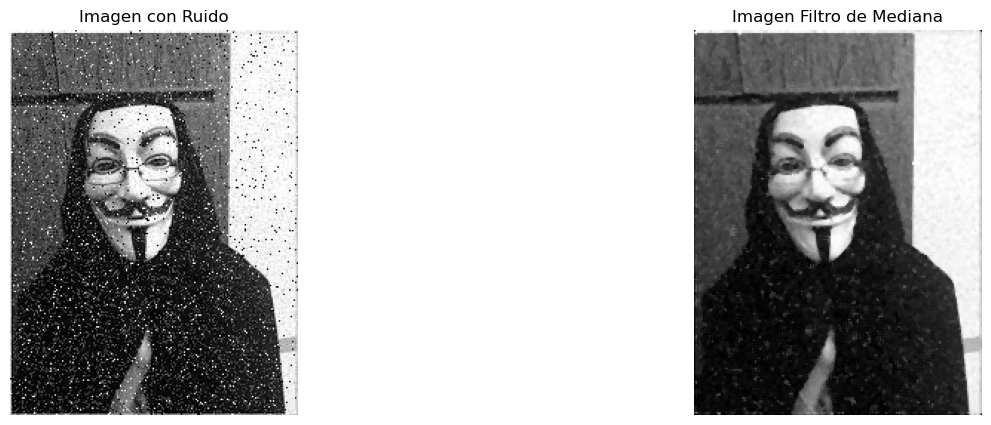

In [44]:
def salt_and_pepper(image, salt_prob, pepper_prob):
    img_array = np.array(image)
    if len(img_array.shape) == 3:
        img_array = img_array[:, :, 0]
    noisy_img = np.copy(img_array)
    total_pixels = img_array.size
    num_salt = int(np.ceil(salt_prob * total_pixels))
    num_pepper = int(np.ceil(pepper_prob * total_pixels))
    salt_coords = [np.random.randint(0, i, num_salt) for i in img_array.shape]
    noisy_img[salt_coords[0], salt_coords[1]] = 255
    pepper_coords = [np.random.randint(0, i, num_pepper) for i in img_array.shape]
    noisy_img[pepper_coords[0], pepper_coords[1]] = 0
    return noisy_img

def median_filter(image, kernel_size):
    """Aplica un filtro de mediana."""
    padding = kernel_size // 2
    padded_image = np.pad(image, padding, mode='constant')
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extraer la ventana alrededor del píxel (i, j)
            window = padded_image[i:i+kernel_size, j:j+kernel_size]
            # Ordenar los valores de la ventana y obtener la mediana
            median_value = np.median(window)
            # Colocar la mediana en la imagen filtrada
            filtered_image[i, j] = median_value

    return filtered_image

# Cargar imagen
image_path = 'paris.jpg'
image = Image.open(image_path).convert('L')

# Aplicar filtro de sal y pimienta
salt_prob = 0.02
pepper_prob = 0.02
noisy_image = salt_and_pepper(image, salt_prob, pepper_prob)

# Aplicar filtro de mediana
filtered_image = median_filter(noisy_image, kernel_size=3)

# Mostrar las imágenes
plt.figure(figsize=(25, 5))
plt.subplot(1, 3, 1)
plt.title('Imagen con Ruido')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Imagen Filtro de Mediana')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()


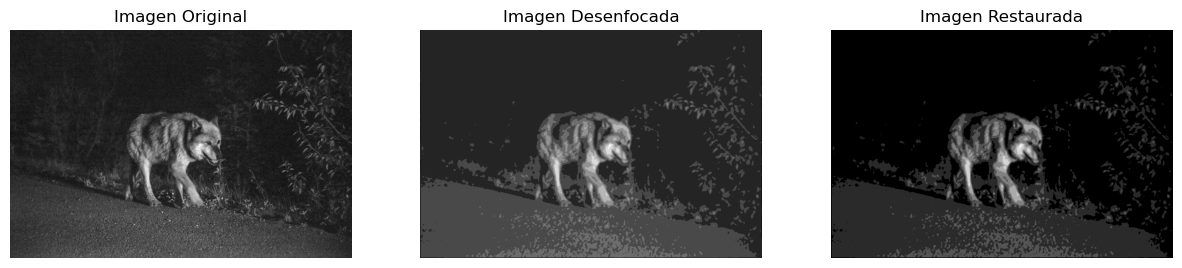

In [7]:
def mean_blur(image, kernel_size):
    """Aplica un desenfoque de media a la imagen."""
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
    pad = kernel_size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    output = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            output[i, j] = np.mean(region * kernel)
    
    return output

def wiener_filter(image, kernel_size, noise_var):
    """Aplica un filtro de Wiener simplificado a la imagen."""
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
    pad = kernel_size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    output = np.zeros_like(image)

    kernel_sum = np.sum(kernel)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            blurred_value = np.mean(region * kernel)
            noisy_value = image[i, j]
            estimate = blurred_value + (noisy_value - blurred_value) / (1 + noise_var)
            output[i, j] = np.clip(estimate, 0, 255)
    
    return output

# Cargar imagen
image_path = 'lobo.jpg'
image = Image.open(image_path).convert('L')
image_array = np.array(image)

# Aplicar desenfoque
blurred_image = mean_blur(image_array, kernel_size=5)

# Aplicar filtro de Wiener
noise_variance = 0.01
restored_image = wiener_filter(blurred_image, kernel_size=5, noise_var=noise_variance)



# Mostrar las imágenes
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(image_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Imagen Desenfocada')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Imagen Restaurada')
plt.imshow(restored_image, cmap='gray')
plt.axis('off')

plt.show()


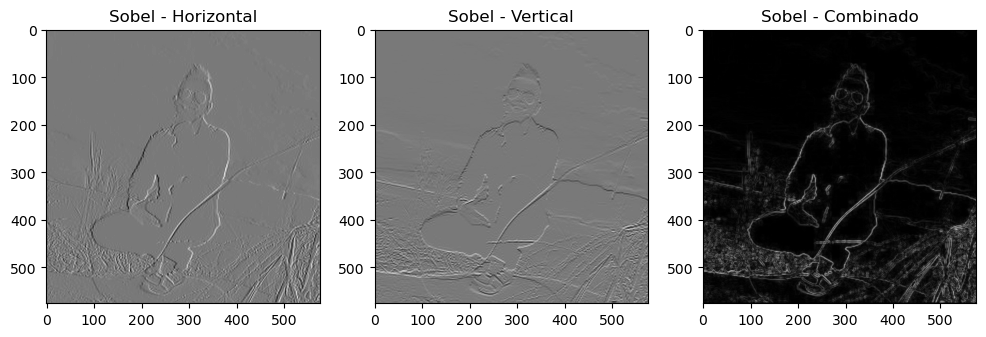

In [79]:

def convolve(image, kernel):
    """Aplica una convolución manualmente sobre la imagen con el kernel dado."""
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Asumimos que el kernel es cuadrado de tamaño impar
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    
    # Inicializamos la imagen de salida con ceros
    output = np.zeros((image_height, image_width))
    
    # Aplicamos la convolución
    for i in range(pad_h, image_height - pad_h):
        for j in range(pad_w, image_width - pad_w):
            region = image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            output[i, j] = np.sum(region * kernel)
    
    return output

def sobel_filters(image):
    """Aplica los filtros de Sobel en las direcciones x e y y calcula la magnitud combinada."""
    # Definir los kernels de Sobel estándar
    kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
    
    kernel_y = np.array([[-1, -2, -1],
                         [ 0,  0,  0],
                         [ 1,  2,  1]])
    
    # Aplicar los filtros de Sobel
    sobel_x = convolve(image, kernel_x)
    sobel_y = convolve(image, kernel_y)
    
    # Calcular la magnitud del gradiente
    sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)
    
    # Normalizar para visualizar correctamente
    sobel_combined = (sobel_combined / np.max(sobel_combined) * 255).astype(np.uint8)
    
    return sobel_x, sobel_y, sobel_combined

# Leer la imagen en escala de grises
img = np.array(Image.open('perfil.jpg').convert('L'))

# Aplicar los filtros de Sobel
sobel_x, sobel_y, sobel_combined = sobel_filters(img)

# Mostrar los resultados
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel - Horizontal')
plt.subplot(132), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel - Vertical')
plt.subplot(133), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel - Combinado')
plt.show()


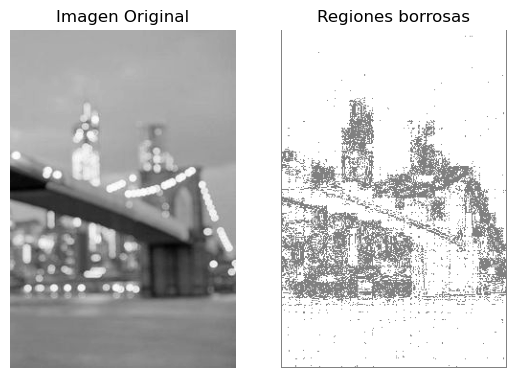

In [80]:
def laplacian_filter(image):
    """Aplica el filtro Laplaciano para detectar bordes."""
    kernel_laplacian = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]])
    
    image_padded = np.pad(image, pad_width=1, mode='constant', constant_values=0)
    laplacian = np.zeros_like(image, dtype=np.float32)
    rows, cols = image.shape

    # Aplicar el filtro de convolución manualmente
    for i in range(rows):
        for j in range(cols):
            laplacian[i, j] = np.sum(image_padded[i:i+3, j:j+3] * kernel_laplacian)
    
    return np.abs(laplacian)

def aplicar_umbral(image, umbral=0.02):
    """Aplica un umbral para resaltar los bordes."""
    umbral_valor = int(umbral * 255)
    umbralizada = np.where(image > umbral_valor, 255, 0)
    return umbralizada.astype(np.uint8)

def detectar_contorno(image, umbral):
    """Detecta los bordes aplicando el filtro Laplaciano y umbralización."""
    laplaciano = laplacian_filter(image)
    bordes_umbralizados = aplicar_umbral(laplaciano, umbral)
    return bordes_umbralizados

def visualizar_desenfoque(imagen_original, bordes_detectados):
    """Visualiza la imagen original y los contornos detectados con fondo blanco y bordes grises."""
    # Crear una imagen blanca
    fondo_blanco = np.ones_like(imagen_original) * 255  # Fondo blanco
    
    # Crear una imagen con los bordes en gris sobre fondo blanco
    contornos_grises = np.copy(fondo_blanco)
    contornos_grises[bordes_detectados > 0] = 128  # Borde en gris (128)
    
    # Mostrar la imagen original y la imagen con los bordes resaltados en gris sobre fondo blanco
    plt.subplot(1, 2, 1)
    plt.imshow(imagen_original, cmap='gray')
    plt.title('Imagen Original')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(contornos_grises, cmap='gray', vmin=0, vmax=255)
    plt.title('Regiones borrosas')
    plt.axis('off')
    
    plt.show()

# Cargar la imagen y convertirla a escala de grises
imagen_original = Image.open('puente.jpg').convert('L')
imagen_gris = np.array(imagen_original)

# Detectar el contorno del objeto (lobo) aplicando el filtro Laplaciano y umbralización
umbral_desenfoque = 0.02
bordes_detectados = detectar_contorno(imagen_gris, umbral_desenfoque)

# Visualizar la imagen original y los contornos resaltados en gris sobre fondo blanco
visualizar_desenfoque(imagen_gris, bordes_detectados)
